In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [29]:
file=r'nnfs_dataset/data_batch_1'
db=unpickle(file)
data1=db[b'data']
label1=np.asarray(db[b'labels'])
file=r'nnfs_dataset/data_batch_2'
db=unpickle(file)
data2=db[b'data']
label2=np.asarray(db[b'labels'])
file=r'nnfs_dataset/data_batch_3'
db=unpickle(file)
data3=db[b'data']
label3=np.asarray(db[b'labels'])

file=r'nnfs_dataset/data_batch_4'
db=unpickle(file)
data4=db[b'data']
label4=np.asarray(db[b'labels'])

file=r'nnfs_dataset/data_batch_5'
db=unpickle(file)
data5=db[b'data']
label5=np.asarray(db[b'labels'])



In [30]:
y_train=np.concatenate((label1,label2,label3,label4,label5),axis=0)
y_train=y_train.reshape(-1,)
X_train=np.concatenate((data1,data2,data3,data4,data5),axis=0)
m=X_train.shape[0]

In [31]:
image=X_train.reshape(50000,1,32,32).transpose(0,2,3,1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [32]:
def plot_sample(X,y,index):
    
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

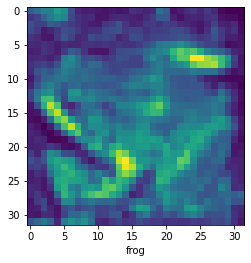

In [34]:
plot_sample(image,y_train,34678)

In [35]:
X_train=X_train.T
X_train=X_train/255


In [36]:
def init_params():
    W1 = np.random.rand(10, 1024) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [37]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.1, 100)

Iteration:  0
[8 8 8 ... 8 8 8] [6 9 9 ... 9 1 1]
0.10098
Iteration:  10
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.1155
Iteration:  20
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11566
Iteration:  30
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.1154
Iteration:  40
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11526
Iteration:  50
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11524
Iteration:  60
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11472
Iteration:  70
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11454
Iteration:  80
[0 0 0 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11464
Iteration:  90
[0 0 9 ... 9 0 0] [6 9 9 ... 9 1 1]
0.11496
